In [37]:
import numpy as np
from ctapipe.io.eventsourcefactory import EventSourceFactory
from ctapipe.calib import CameraCalibrator
from ctapipe.image.hillas import hillas_parameters
from ctapipe.image.cleaning import tailcuts_clean
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
names_to_id = {'LSTCam': 1, 'NectarCam': 2, 'FlashCam': 3, 'DigiCam': 4, 'CHEC': 5}
types_to_id = {'LST': 1, 'MST': 2, 'SST': 3}
allowed_cameras = ['LSTCam', 'NectarCam', 'DigiCam']

In [8]:
n_events = 100
gamma_file='./raw/gamma_20deg_0deg_run485___cta-prod3-merged_desert-2150m-Paranal-3HB89-NGFD.simtel.gz'

In [9]:
event_source = EventSourceFactory.produce(
    input_url=gamma_file,
    max_events=n_events if n_events > 1 else None,
    
)

calibrator = CameraCalibrator(
    eventsource=event_source,
    r1_product='HESSIOR1Calibrator',
)


In [19]:
events =  [e for e in tqdm(event_source)]
[calibrator.calibrate(e) for e in events]
None

100it [00:06, 16.48it/s]


In [20]:
event = events[0]

In [68]:
lst_tel_ids = np.array([i for (i, tel) in event.inst.subarray.tel.items() if tel.camera.cam_id  == 'LSTCam'])
mst_tel_ids = np.array([i for (i, tel) in event.inst.subarray.tel.items() if tel.camera.cam_id  == 'NectarCam'])
sst_tel_ids = np.array([i for (i, tel) in event.inst.subarray.tel.items() if tel.camera.cam_id  == 'DigiCam'])

allowed_tel_ids = np.concatenate([lst_tel_ids, mst_tel_ids, sst_tel_ids])
allowed_tel_ids

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194], dtype=int32)

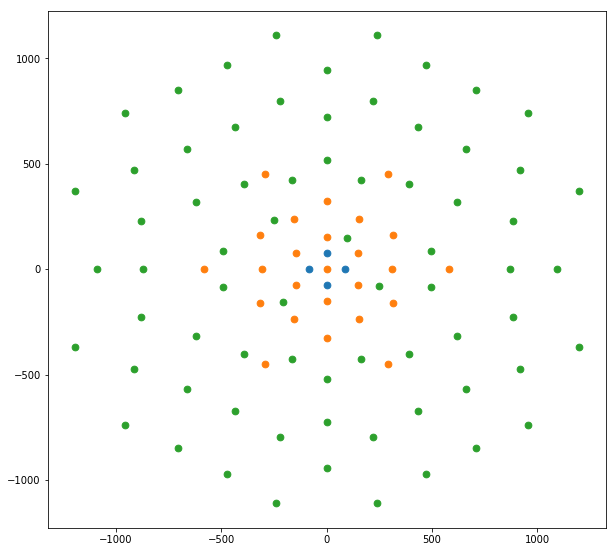

In [69]:
plt.figure(figsize=(10, 10))
x = event.inst.subarray.pos_x[lst_tel_ids - 1]
y = event.inst.subarray.pos_y[lst_tel_ids - 1]
plt.scatter(x, y, s=45)
x = event.inst.subarray.pos_x[mst_tel_ids - 1]
y = event.inst.subarray.pos_y[mst_tel_ids - 1]
plt.scatter(x, y, s=45)
x = event.inst.subarray.pos_x[sst_tel_ids - 1]
y = event.inst.subarray.pos_y[sst_tel_ids - 1]
plt.scatter(x, y, s=45)
plt.axes().set_aspect('equal')